In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr
import os
from google.colab.patches import cv2_imshow


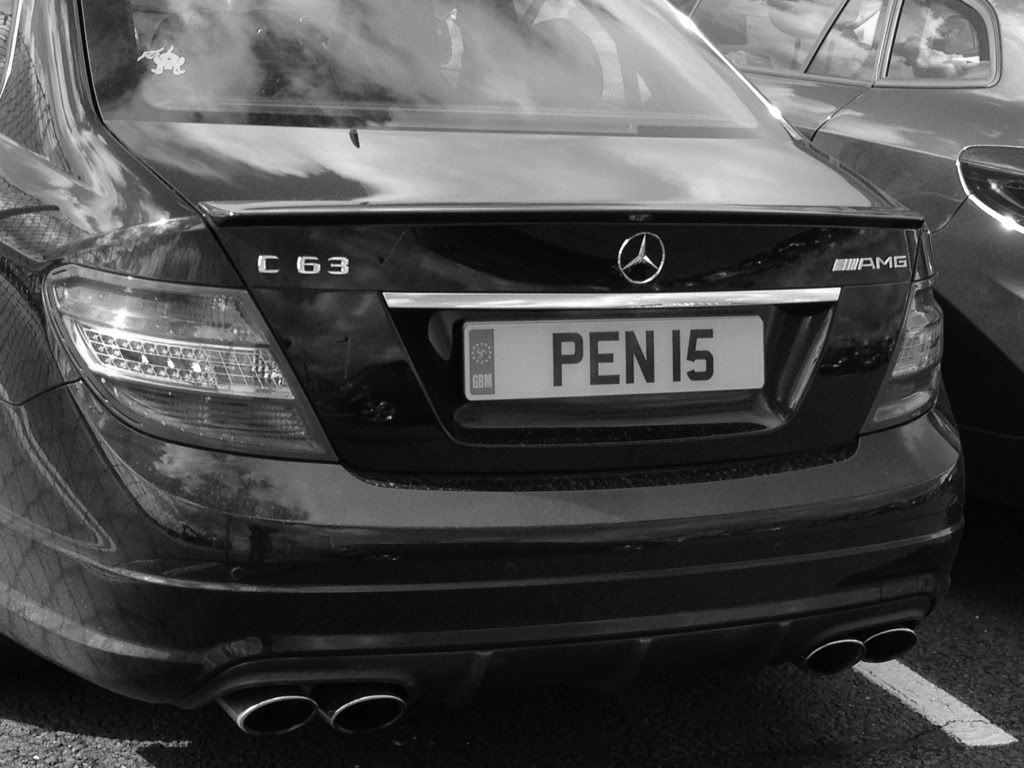

In [4]:
    img = cv2.imread('/content/drive/MyDrive/Analysis/images/car4.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)

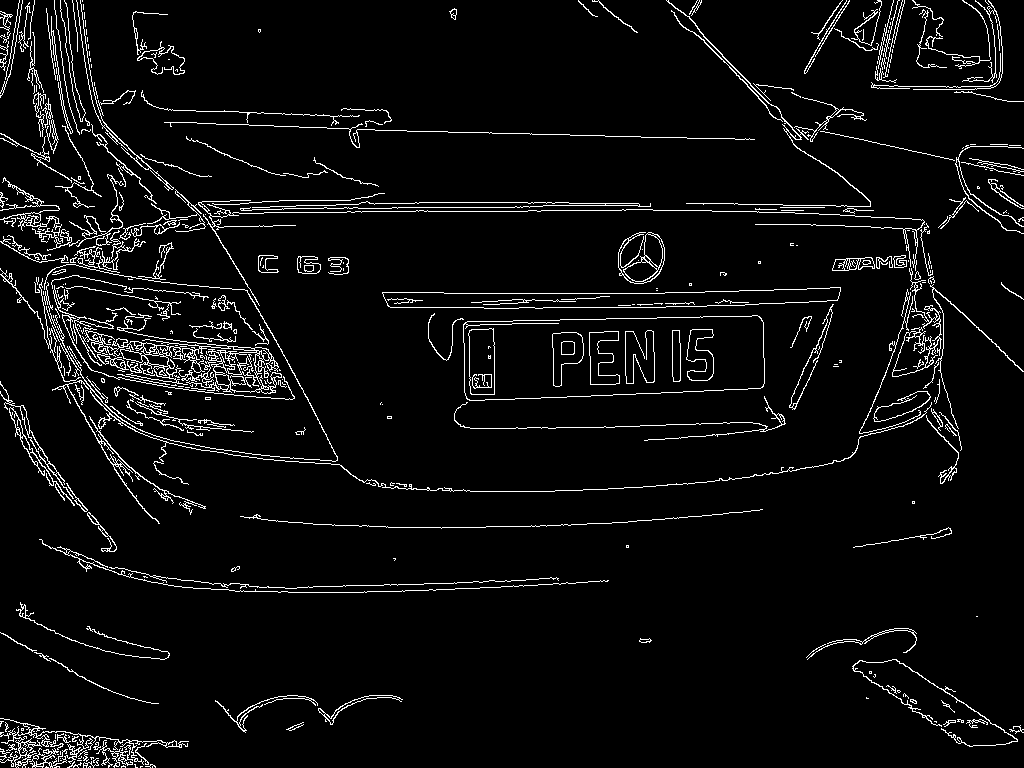

In [5]:
bilateral = cv2.bilateralFilter(gray,20,17,17)
edged = cv2.Canny(bilateral,30,200)
cv2_imshow(edged)

In [6]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [7]:
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key=cv2.contourArea,reverse=True)[:10]


In [8]:
# Specify the location of the plate
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,30,True)
    if (len(approx) == 4):
      location = approx
      break
len(location)

4

In [9]:
location

array([[[763, 322]],

       [[467, 321]],

       [[464, 392]],

       [[760, 388]]], dtype=int32)

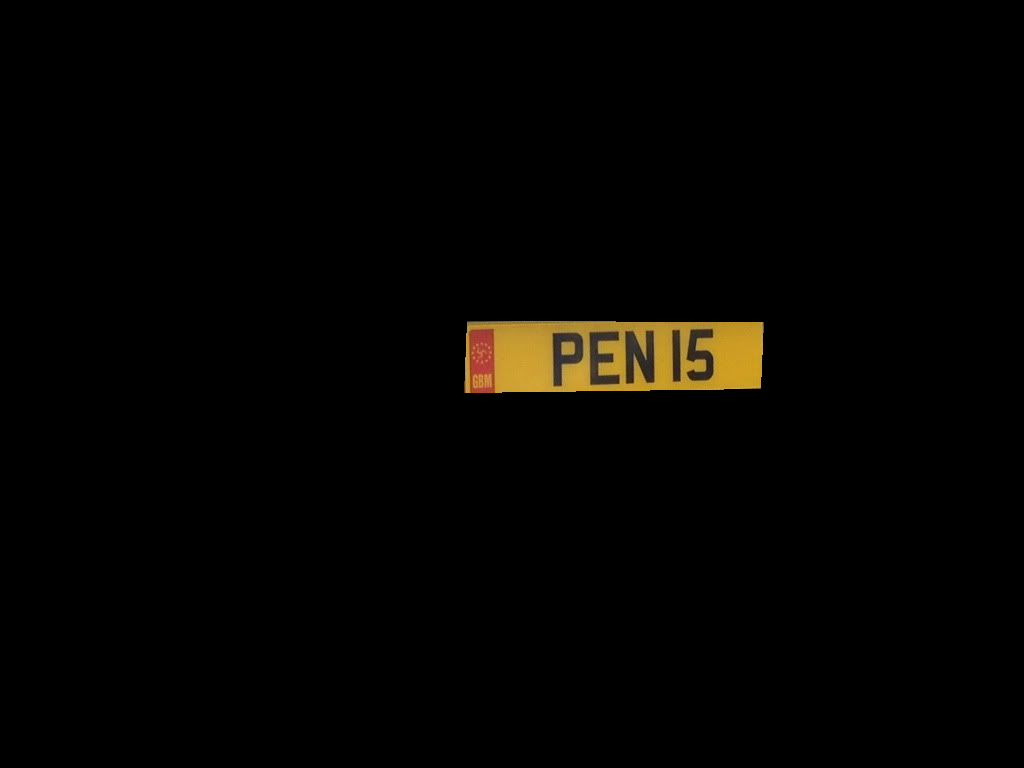

In [10]:
mask = np.zeros(gray.shape,np.uint8)
new_img = cv2.drawContours(mask , [location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask = mask)
cv2_imshow(new_image)

In [11]:
(x,y) = np.where(mask==255)
(x1,y1)= (np.min(x),np.min(y))
(x2,y2)= (np.max(x),np.max(y))
cropped_img = gray[x1:x2+1,y1:y2+1]

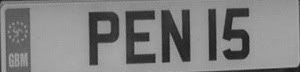

In [12]:
cv2_imshow(cropped_img)

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_img)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[([[80, 0], [260, 0], [260, 72], [80, 72]], 'PEN I5', 0.8924829315386402)]

In [14]:
# Let's write our characters on the image
text = result[0][-2]
text

'PEN I5'

In [15]:
font = cv2.FONT_HERSHEY_TRIPLEX
res = cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=2 ,color=(0,255,0),thickness=2,lineType = cv2.LINE_AA)
res = cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)

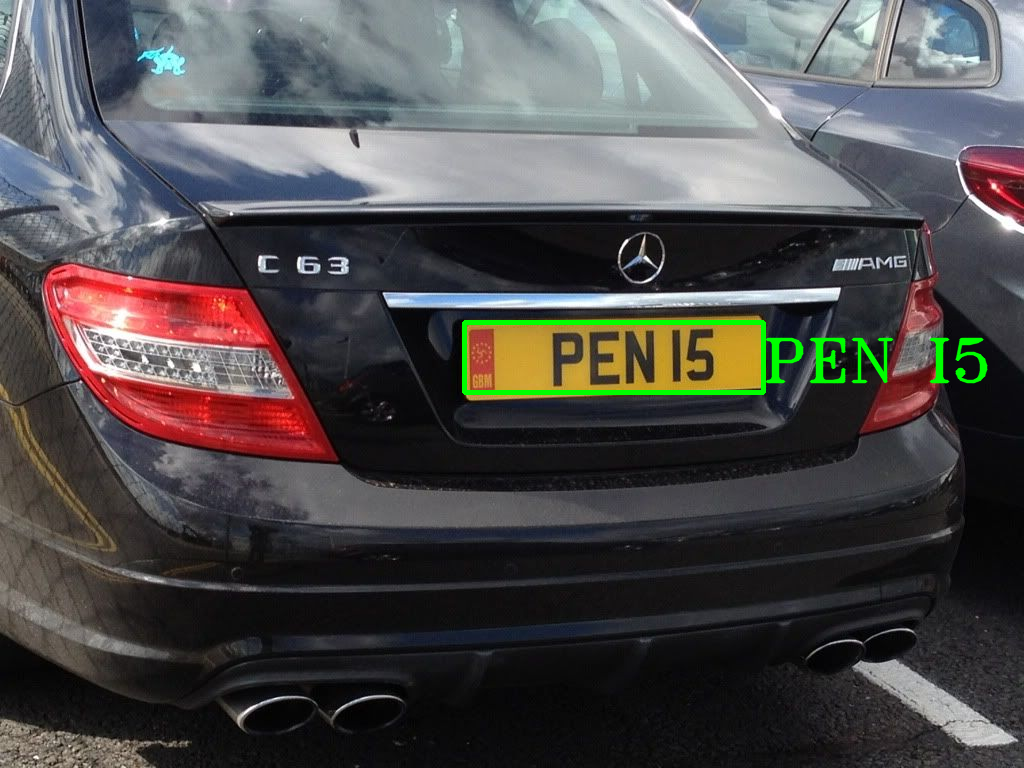

In [16]:
cv2_imshow(res)